In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import random

In [25]:
data = pd.DataFrame({'Aggri':['Farmer1','Village2','Town3','City4','Downtown5'], 'num': range(5),
                  'Sales': [4,12,28,52,80]})
data

,Aggri,Sales,num
0,Farmer1,4,0
1,Village2,12,1
2,Town3,28,2
3,City4,52,3
4,Downtown5,80,4


In [3]:
len(data['num'])

5

## Equation of Straight Line

In [4]:
(x1, y1) = (1,4)
(x2, y2) = (5,80)
# given (x1,x2)= (1,4) and (y1,y2) = (5,80)
# m = Change in Y / Change in X


In [5]:
def line(x1 = 1, x2 = 5, y1 = 4, y2 = 80):
    m = (y2-y1)/(x2-x1)
    return m
line()
#calculated we got b = -15
#given m = 19, b = -15, x = range(5) we need to calculate y

19

In [22]:
# equation of line y = mx+b
line = []
def line_y(m =19, b = -15):
    x = range(1,6)

    for row in x:
        line.append((m*row)+b)
line_y()

## Least Square Regression

Equation of Straight Line (y = mx + b)

In [13]:
class LSR:
    def __init__(self, mean1 = data['num'], xmean = data['num']/len(data['num']), mean2 = data['Sales'], ymean = data['Sales']/len(data['Sales'])):
        self.mean1 = mean1
        self.xmean = np.sum(xmean)
        self.xxmean = (self.mean1-self.xmean)
        
        self.mean2 = mean2
        self.ymean = np.sum(ymean)
        self.yymean = (self.mean2-self.ymean)
        
        self.sum_nume = np.sum(self.xxmean * self.yymean)
        
        #Now lets calculate denominator part of the equation Sum of (x — xmean)**2
        
        self.sum_deno = np.sum(self.xxmean**2)
        
        #Overall calculation would be  m = sum of ALL(x-xmean)*(y-ymean)/ sum of (x-xmean)**2
        
        self.m = self.sum_nume/self.sum_deno
        
        self.totalcalculation = (np.sum(self.ymean) - (self.m*np.sum(self.xmean)))
        
# The overall formula can now be written in the form of y = mx + b as
        
    def b(self):
        return ((self.m*self.mean1) + self.totalcalculation)

In [14]:
test = LSR()
# print test.xxmean
# print '='*50
# print test.yymean

print test.sum_nume
print test.sum_deno
print '='*50
print test.totalcalculation
print test.b()

192.0
10.0
-3.1999999999999957
0    -3.2
1    16.0
2    35.2
3    54.4
4    73.6
Name: num, dtype: float64


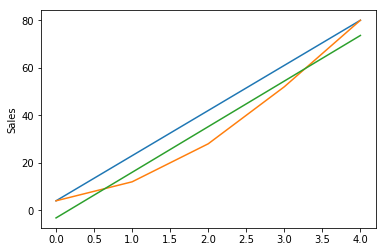

In [28]:
from matplotlib import pyplot as plt
plt.plot(data.num, line)
plt.plot(data.num, data.Sales)
plt.plot(data.num, test.b())

plt.ylabel('Sales')
plt.show()

In [38]:
line_eq = pd.DataFrame({'x-Axis':data.num, 'y-Axis':data.Sales, 'Line_predicted':line,'Error':data.Sales-line, 'SquareError':(data.Sales-line)**2})
print line_eq
print'='*50
print "MSE of Line", np.sum(line_eq.SquareError)

   Error  Line_predicted  SquareError  x-Axis  y-Axis
0      0               4            0       0       4
1    -11              23          121       1      12
2    -14              42          196       2      28
3     -9              61           81       3      52
4      0              80            0       4      80
MSE of Line 398


In [41]:
Least_square = pd.DataFrame({'x-Axis':data.num, 'y-Axis':data.Sales, 'Least_Square':test.b(),'Error':data.Sales-test.b(), 'SquareError':(data.Sales-test.b())**2})
print Least_square
print'='*50
print "MSE of Least Square", np.sum(Least_square.SquareError)

   Error  Least_Square  SquareError  x-Axis  y-Axis
0    7.2          -3.2        51.84       0       4
1   -4.0          16.0        16.00       1      12
2   -7.2          35.2        51.84       2      28
3   -2.4          54.4         5.76       3      52
4    6.4          73.6        40.96       4      80
MSE of Least Square 166.40000000000006


As we can see that Least Square Method provide better results than a plain straight line between two points calculation

Ordinary Least Square method looks simple and computation is easy. But, this OLS method will only work for a univariate dataset which is single independent variables and single dependent variables. Multi-variate dataset contains a single independent variables set and multiple dependent variables sets, require us to use a machine learning algorithm called “Gradient Descent”.